In [11]:
import pandas as pd

def process_attendance_data(input_csv, output_csv):
    """
    Extracts only 'InTime' and 'OutTime' for each employee,
    ensuring dates are correctly aligned.
    """
    # Read CSV without headers to analyze structure
    df = pd.read_csv(input_csv, header=None, encoding="utf-8")
    
    # Locate the row containing actual dates (assumed to be right above "Employee:")
    date_row_index = df[df.iloc[:, 0] == "Days"].index[0]  # Locate where dates are stored
    dates = df.iloc[date_row_index, 2:].tolist()  # Extract dates from columns (ignoring first two columns)
    
    # Locate where employee data starts
    emp_rows = df[df.iloc[:, 0] == "Employee:"].index.tolist()
    
    cleaned_data = [["Employee", "Days"] + dates]  # Initialize with header containing dates
    
    for i in range(len(emp_rows)):
        start_idx = emp_rows[i]
        end_idx = emp_rows[i + 1] if i + 1 < len(emp_rows) else len(df)
        
        # Extract Employee Name
        employee_name = str(df.iloc[start_idx, 3]).split(":")[-1].strip()
        
        # Extract the subset of data belonging to this employee
        emp_data = df.iloc[start_idx:end_idx]
        
        # Locate 'InTime' and 'OutTime' rows
        status_row = emp_data[emp_data.iloc[:, 0] == "Status"]
        intime_row = emp_data[emp_data.iloc[:, 0] == "InTime"]
        outtime_row = emp_data[emp_data.iloc[:, 0] == "OutTime"]
        
        # Extract only time-related columns (ignoring unwanted ones)
        if not intime_row.empty and not outtime_row.empty:
            intime_values = intime_row.iloc[:, 2:].values.flatten()
            outtime_values = outtime_row.iloc[:, 2:].values.flatten()
            
            cleaned_data.append([employee_name, "InTime"] + list(intime_values))
            cleaned_data.append([employee_name, "OutTime"] + list(outtime_values))
    
    # Convert cleaned data into DataFrame
    new_df = pd.DataFrame(cleaned_data)
    new_df = new_df.dropna(axis=1, how='all')
    
    # Save cleaned CSV
    new_df.to_csv(output_csv, index=False, header=False)
    print(f"✅ Cleaned data saved to: {output_csv}")

# Example usage
process_attendance_data(r"D:\Cleaned Attendance\oct biometric.csv", "cleaned_attendance_oct.csv")


✅ Cleaned data saved to: cleaned_attendance_oct.csv


In [12]:
import pandas as pd

def process_attendance_data(input_csv, output_csv):
    """
    Extracts 'Status', 'InTime', and 'OutTime' for each employee,
    ensuring dates are correctly aligned.
    """
    # Read CSV without headers to analyze structure
    df = pd.read_csv(input_csv, header=None, encoding="utf-8")
    
    # Locate the row containing actual dates (assumed to be right above "Employee:")
    date_row_index = df[df.iloc[:, 0] == "Days"].index[0]  # Locate where dates are stored
    dates = df.iloc[date_row_index, 2:].tolist()  # Extract dates from columns (ignoring first two columns)
    
    # Locate where employee data starts
    emp_rows = df[df.iloc[:, 0] == "Employee:"].index.tolist()
    
    cleaned_data = [["Employee", "Days"] + dates]  # Initialize with header containing dates
    
    for i in range(len(emp_rows)):
        start_idx = emp_rows[i]
        end_idx = emp_rows[i + 1] if i + 1 < len(emp_rows) else len(df)
        
        # Extract Employee Name
        employee_name = str(df.iloc[start_idx, 3]).split(":")[-1].strip()
        
        # Extract the subset of data belonging to this employee
        emp_data = df.iloc[start_idx:end_idx]
        
        # Locate 'Status', 'InTime', and 'OutTime' rows
        status_row = emp_data[emp_data.iloc[:, 0] == "Status"]
        intime_row = emp_data[emp_data.iloc[:, 0] == "InTime"]
        outtime_row = emp_data[emp_data.iloc[:, 0] == "OutTime"]
        
        # Extract values while ignoring unwanted columns
        if not status_row.empty:
            status_values = status_row.iloc[:, 2:].values.flatten()
            cleaned_data.append([employee_name, "Status"] + list(status_values))
        
        if not intime_row.empty:
            intime_values = intime_row.iloc[:, 2:].values.flatten()
            cleaned_data.append([employee_name, "InTime"] + list(intime_values))
        
        if not outtime_row.empty:
            outtime_values = outtime_row.iloc[:, 2:].values.flatten()
            cleaned_data.append([employee_name, "OutTime"] + list(outtime_values))
    
    # Convert cleaned data into DataFrame
    new_df = pd.DataFrame(cleaned_data)
    new_df = new_df.dropna(axis=1, how='all')
    
    # Save cleaned CSV
    new_df.to_csv(output_csv, index=False, header=False)
    print(f"✅ Cleaned data with Status saved to: {output_csv}")

# Example usage
process_attendance_data(r"D:\Cleaned Attendance\oct biometric.csv", "cleaned_attendance_oct.csv")


✅ Cleaned data with Status saved to: cleaned_attendance_oct.csv


In [13]:
data = pd.read_csv(r"cleaned_attendance_oct.csv")

In [14]:
data

,Employee,Days,1 T,2 W,3 Th,4 F,5 St,6 S,7 M,8 T,...,22 T,23 W,24 Th,25 F,26 St,27 S,28 M,29 T,30 W,31 Th
0,Priyanka Bhise,Status,A,A,A,P,A,WOP,A,P,...,A,½P,A,A,P,WO,P,P,P,P
1,Priyanka Bhise,InTime,NaN,NaN,NaN,09:12,NaN,12:19,NaN,09:10,...,NaN,09:14,NaN,NaN,09:11,NaN,09:27,09:17,09:14,09:15
2,Priyanka Bhise,OutTime,NaN,NaN,NaN,NaN,NaN,17:25,NaN,NaN,...,NaN,09:21,NaN,NaN,18:02,NaN,NaN,NaN,19:37,NaN
3,Mrunal Bothare,Status,A,A,A,A,A,WO,A,A,...,P,P,P,P,P,WO,P,P,P,P
4,Mrunal Bothare,InTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,09:47,10:09,10:03,09:35,09:54,NaN,09:24,09:51,09:56,10:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,KV Devika Ratheesh,InTime,09:44,NaN,09:49,09:47,09:47,NaN,09:37,09:42,...,NaN,09:38,09:44,09:53,NaN,NaN,10:50,09:40,09:34,09:42
182,KV Devika Ratheesh,OutTime,18:40,NaN,18:45,18:38,18:35,NaN,18:34,18:40,...,NaN,18:36,18:36,18:39,NaN,NaN,18:40,18:41,18:35,18:08
183,999,Status,A,A,A,A,A,WO,A,A,...,A,A,A,A,A,WO,A,A,A,A
184,999,InTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = data.dropna(axis=1, how='all')

In [16]:
df

,Employee,Days,1 T,2 W,3 Th,4 F,5 St,6 S,7 M,8 T,...,22 T,23 W,24 Th,25 F,26 St,27 S,28 M,29 T,30 W,31 Th
0,Priyanka Bhise,Status,A,A,A,P,A,WOP,A,P,...,A,½P,A,A,P,WO,P,P,P,P
1,Priyanka Bhise,InTime,NaN,NaN,NaN,09:12,NaN,12:19,NaN,09:10,...,NaN,09:14,NaN,NaN,09:11,NaN,09:27,09:17,09:14,09:15
2,Priyanka Bhise,OutTime,NaN,NaN,NaN,NaN,NaN,17:25,NaN,NaN,...,NaN,09:21,NaN,NaN,18:02,NaN,NaN,NaN,19:37,NaN
3,Mrunal Bothare,Status,A,A,A,A,A,WO,A,A,...,P,P,P,P,P,WO,P,P,P,P
4,Mrunal Bothare,InTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,09:47,10:09,10:03,09:35,09:54,NaN,09:24,09:51,09:56,10:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,KV Devika Ratheesh,InTime,09:44,NaN,09:49,09:47,09:47,NaN,09:37,09:42,...,NaN,09:38,09:44,09:53,NaN,NaN,10:50,09:40,09:34,09:42
182,KV Devika Ratheesh,OutTime,18:40,NaN,18:45,18:38,18:35,NaN,18:34,18:40,...,NaN,18:36,18:36,18:39,NaN,NaN,18:40,18:41,18:35,18:08
183,999,Status,A,A,A,A,A,WO,A,A,...,A,A,A,A,A,WO,A,A,A,A
184,999,InTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Existing Pipeline

In [17]:
import pandas as pd

import pandas as pd

def create_employee_dict(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file, header=None)
    df = df.dropna(axis=1, how='all')
    
    # Extract header row (dates)
    dates = df.iloc[0, 2:].tolist()
    
    # Initialize the dictionary to hold the final data
    employee_data = {}
    
    i = 1  # Start from the first data row
    while i < len(df):
        employee_name = df.iloc[i, 0]
        
        if pd.notna(employee_name):  # Check for valid employee name
            # Extract Status, InTime, and OutTime rows
            status_row = df.iloc[i, 2:].tolist()
            in_time_row = df.iloc[i + 1, 2:].tolist() if i + 1 < len(df) else []
            out_time_row = df.iloc[i + 2, 2:].tolist() if i + 2 < len(df) else []
            
            # Build the employee dictionary with Status after Days
            employee_dict = {
                'Days': dates,
                'Status': [str(x) if pd.notna(x) else 'NaT' for x in status_row],
                'InTime': [str(x) if pd.notna(x) else 'NaT' for x in in_time_row],
                'OutTime': [str(x) if pd.notna(x) else 'NaT' for x in out_time_row]
            }
            
            # Store the employee data
            employee_data[employee_name] = employee_dict
            
            # Move to the next employee (each has three rows: Status, InTime, and OutTime)
            i += 3
        else:
            i += 1  # Skip invalid rows
    
    return employee_data

# Example usage
employee_data = create_employee_dict("cleaned_attendance_oct.csv")



# NEW PIPELINE WITH DIRECT BIOMETRIC DATA UPLOAD

In [18]:
import pandas as pd
from datetime import datetime, timedelta

def process_attendance_data(input_csv):
    """
    Extracts 'Status', 'InTime', and 'OutTime' for each employee,
    ensuring dates are correctly aligned.
    """
    # Read CSV without headers to analyze structure
    df = pd.read_csv(input_csv, header=None, encoding="utf-8")
    
    # Locate the row containing actual dates (assumed to be right above "Employee:")
    date_row_index = df[df.iloc[:, 0] == "Days"].index[0]  # Locate where dates are stored
    dates = df.iloc[date_row_index, 2:].tolist()  # Extract dates from columns (ignoring first two columns)
    
    # Locate where employee data starts
    emp_rows = df[df.iloc[:, 0] == "Employee:"].index.tolist()
    
    cleaned_data = [["Employee", "Days"] + dates]  # Initialize with header containing dates
    
    for i in range(len(emp_rows)):
        start_idx = emp_rows[i]
        end_idx = emp_rows[i + 1] if i + 1 < len(emp_rows) else len(df)
        
        # Extract Employee Name
        employee_name = str(df.iloc[start_idx, 3]).split(":")[-1].strip()
        
        # Extract the subset of data belonging to this employee
        emp_data = df.iloc[start_idx:end_idx]
        
        # Locate 'Status', 'InTime', and 'OutTime' rows
        status_row = emp_data[emp_data.iloc[:, 0] == "Status"]
        intime_row = emp_data[emp_data.iloc[:, 0] == "InTime"]
        outtime_row = emp_data[emp_data.iloc[:, 0] == "OutTime"]
        
        # Extract values while ignoring unwanted columns
        if not status_row.empty:
            status_values = status_row.iloc[:, 2:].values.flatten()
            cleaned_data.append([employee_name, "Status"] + list(status_values))
        
        if not intime_row.empty:
            intime_values = intime_row.iloc[:, 2:].values.flatten()
            cleaned_data.append([employee_name, "InTime"] + list(intime_values))
        
        if not outtime_row.empty:
            outtime_values = outtime_row.iloc[:, 2:].values.flatten()
            cleaned_data.append([employee_name, "OutTime"] + list(outtime_values))
    
    # Convert cleaned data into DataFrame
    new_df = pd.DataFrame(cleaned_data)
    new_df = new_df.dropna(axis=1, how='all')

    return new_df
    
def create_employee_dict(df):
    
    # Extract header row (dates)
    dates = df.iloc[0, 2:].tolist()
    
    # Initialize the dictionary to hold the final data
    employee_data = {}
    
    i = 1  # Start from the first data row
    while i < len(df):
        employee_name = df.iloc[i, 0]
        
        if pd.notna(employee_name):  # Check for valid employee name
            # Extract Status, InTime, and OutTime rows
            status_row = df.iloc[i, 2:].tolist()
            in_time_row = df.iloc[i + 1, 2:].tolist() if i + 1 < len(df) else []
            out_time_row = df.iloc[i + 2, 2:].tolist() if i + 2 < len(df) else []
            
            # Build the employee dictionary with Status after Days
            employee_dict = {
                'Days': dates,
                'Status': [str(x) if pd.notna(x) else 'NaT' for x in status_row],
                'InTime': [str(x) if pd.notna(x) else 'NaT' for x in in_time_row],
                'OutTime': [str(x) if pd.notna(x) else 'NaT' for x in out_time_row]
            }
            
            # Store the employee data
            employee_data[employee_name] = employee_dict
            
            # Move to the next employee (each has three rows: Status, InTime, and OutTime)
            i += 3
        else:
            i += 1  # Skip invalid rows
    
    return employee_data

def pasting_date(employee_dict, month, year):
    # Map month abbreviations to full month names
    month_map = {
        "Jan": "January",
        "Feb": "February",
        "Mar": "March",
        "Apr": "April",
        "May": "May",
        "Jun": "June",
        "Jul": "July",
        "Aug": "August",
        "Sep": "September",
        "Oct": "October",
        "Nov": "November",
        "Dec": "December"
    }

    # Get the full month name from the abbreviation
    full_month = month_map.get(month[:3], month)  # Use the first three letters for mapping

    for employee, data in employee_dict.items():
        days_list = data['Days']
        formatted_days = []

        for day in days_list:
            if isinstance(day, str) and len(day) > 0:
                day_num, day_abbr = day.split()
                day_num = int(day_num)
                # Map the day abbreviation to the full weekday name
                day_map = {
                    'M': 'Monday',
                    'T': 'Tuesday',
                    'W': 'Wednesday',
                    'Th': 'Thursday',
                    'F': 'Friday',
                    'St': 'Saturday',
                    'S': 'Sunday'
                }
                weekday = day_map.get(day_abbr, 'Unknown')
                formatted_days.append(f"{day_num} {full_month} {year}, {weekday}")

        # Update the employee's Days in the dictionary
        employee_dict[employee]['Days'] = formatted_days

    return employee_dict

def update_weekdays(employee_dict):
    # Map the full weekday names to their corresponding abbreviations
    day_map = {
        'Monday': 'M',
        'Tuesday': 'T',
        'Wednesday': 'W',
        'Thursday': 'Th',
        'Friday': 'F',
        'Saturday': 'St',
        'Sunday': 'S'
    }

    for employee, data in employee_dict.items():
        days_list = data['Days']
        status_list = []

        for day in days_list:
            # Extract the weekday from the day string
            day_parts = day.split(', ')
            day_date = day_parts[0]  # e.g., '1 July 2024'
            weekday = day_parts[1]  # e.g., 'Monday'

            # Update status based on the weekday
            if weekday == 'Sunday':
                status_list.append('WO')
            else:
                status_list.append('P')

        # Update the employee's Status in the dictionary
        employee_dict[employee]['Status'] = status_list

    return employee_dict

def holiday_calculation(employee_dict, holiday_dates):
    # Convert holiday_dates to a set for faster lookup
    holiday_set = set(holiday_dates)

    for employee, data in employee_dict.items():
        days = data['Days']
        status = data['Status']

        for i, day in enumerate(days):
            # Extract the date part from the day string
            date_str = day.split(',')[0]  # Get the date part (e.g., '1 July 2024')
            if date_str in holiday_set:
                status[i] = 'HO'  # Mark as holiday

        # Update the employee's Status in the dictionary
        employee_dict[employee]['Status'] = status

    return employee_dict

def daily_working_hours_calculation(employee_dict):
    for employee, data in employee_dict.items():
        in_times = data['InTime']
        out_times = data['OutTime']
        daily_working_hours = []

        for in_time, out_time in zip(in_times, out_times):
            if in_time != 'NaT' and out_time != 'NaT':
                # Function to parse time strings
                def parse_time(time_str):
                    if ' ' in time_str:  # Check if it's a full datetime string
                        time_str = time_str.split(' ')[1]  # Get the time part
                    return datetime.strptime(time_str, '%H:%M') if len(time_str) == 5 else datetime.strptime(time_str,
                                                                                                             '%H:%M:%S')

                try:
                    in_time_dt = parse_time(in_time)
                    out_time_dt = parse_time(out_time)

                    # Calculate the difference in time
                    working_duration = out_time_dt - in_time_dt

                    # Handle cases where the out time is on the next day
                    if working_duration < timedelta(0):
                        working_duration += timedelta(days=1)

                    # Convert duration to HH:MM format
                    hours, remainder = divmod(working_duration.total_seconds(), 3600)
                    minutes = remainder // 60
                    daily_working_hours.append(f"{int(hours):02}:{int(minutes):02}")
                except ValueError:
                    daily_working_hours.append("NaT")  # Append "NaT" if parsing fails
            else:
                daily_working_hours.append("NaT")  # Append "NaT" if in_time or out_time is 'NaT'

        # Update the employee's dailyWorkingHours in the dictionary
        employee_dict[employee]['dailyWorkingHours'] = daily_working_hours

    return employee_dict


def calculate_absentees(employee_dict):
    for employee, data in employee_dict.items():
        in_times = data['InTime']
        out_times = data['OutTime']
        status = data['Status']

        # Determine the length to iterate over (minimum length of the lists)
        length = min(len(in_times), len(out_times), len(status))

        for i in range(length):
            # Check if both InTime and OutTime are missing and status is not WO or HO
            if (in_times[i] == 'NaT' and out_times[i] == 'NaT') and status[
                i] not in ['WO', 'HO']:
                status[i] = 'A'  # Mark as Absent

        # Update the employee's Status in the dictionary
        employee_dict[employee]['Status'] = status
        employee_dict[employee]['totalAbsentDays'] = data['Status'].count('A')

    return employee_dict


def calculating_half_day(employee_dict):
    for employee, data in employee_dict.items():
        daily_working_hours = data['dailyWorkingHours']
        status = data['Status']

        for i in range(len(daily_working_hours)):
            # Check if daily working hours is not NaT and less than 6 hours
            if daily_working_hours[i] != 'NaT':
                hours, minutes = map(int, daily_working_hours[i].split(':'))
                total_hours = hours + minutes / 60  # Convert to decimal hours

                if total_hours < 6:
                    status[i] = 'P1/2'  # Mark as half day

        # Update the employee's Status in the dictionary
        employee_dict[employee]['Status'] = status

    return employee_dict


def calculate_absolute_overtime(employee_dict):
    for employee, data in employee_dict.items():
        daily_working_hours = data['dailyWorkingHours']
        in_times = data['InTime']
        out_times = data['OutTime']

        # Initialize variables
        total_absolute_overtime_minutes = 0
        over_time_list = []

        for in_time, out_time, hours in zip(in_times, out_times, daily_working_hours):
            if in_time != 'NaT' and out_time != 'NaT' and hours != 'NaT':  # Check if the times are valid
                h, m = map(int, hours.split(':'))
                total_minutes = h * 60 + m  # Convert to total minutes

                # Calculate Overtime
                if total_minutes > 540:  # 540 minutes = 9 hours
                    overtime_minutes = total_minutes - 540
                    over_time = f"{overtime_minutes // 60:02}:{overtime_minutes % 60:02}"  # Format as HH:MM
                    over_time_list.append(over_time)
                    total_absolute_overtime_minutes += overtime_minutes  # Keep total in minutes
                else:
                    over_time_list.append("00:00")  # No overtime
            else:
                over_time_list.append("00:00")  # No overtime if in_time or out_time is NaT

        # Convert total absolute overtime from minutes to HH:MM format
        absolute_hours = total_absolute_overtime_minutes // 60
        absolute_minutes = total_absolute_overtime_minutes % 60
        data['AbsoluteOverTime'] = f"{absolute_hours:02}:{absolute_minutes:02}"

        # Store results in the employee's data
        data['OverTime'] = over_time_list

    return employee_dict

def calculate_payable_overtime(employee_dict):
    for employee, data in employee_dict.items():
        overtime_list = data['OverTime']

        # Initialize total payable overtime in minutes
        total_payable_minutes = 0

        # Iterate through the OverTime list
        for overtime in overtime_list:
            if overtime != "NaT" and overtime != "00:00":  # Check if the value is valid
                h, m = map(int, overtime.split(':'))
                total_overtime_minutes = h * 60 + m  # Convert to total minutes

                # Add to payable overtime if it exceeds 1 hour (60 minutes)
                if total_overtime_minutes > 60:
                    total_payable_minutes += total_overtime_minutes

        # Calculate PayableOverTime
        payable_minutes = total_payable_minutes

        # Convert back to HH:MM format
        if payable_minutes < 0:
            payable_minutes = 0  # Ensure it doesn't go negative

        payable_hours = payable_minutes // 60
        payable_remainder_minutes = payable_minutes % 60
        data['PayableOverTime'] = f"{payable_hours:02}:{payable_remainder_minutes:02}"

    return employee_dict


def saturday_compoff(employee_dict):
    """
    Function to calculate CompOffTotal and update employee's Saturday statuses based on attendance rules.

    Args:
        employee_dict (dict): Dictionary containing employee data.

    Returns:
        dict: Updated employee dictionary with CompOffTotal and modified Saturday statuses.
    """
    for employee, data in employee_dict.items():
        # Initialize variables
        comp_off_total = 0
        status_list = data['Status']  # List of statuses for each day of the month
        days_list = data['Days']  # List of corresponding days

        absent_saturdays = 0
        working_saturdays = 0  # Saturdays excluding holidays

        # Iterate over days to evaluate Saturdays
        for i in range(len(days_list)):
            if 'Saturday' in days_list[i]:  # Check if the day is a Saturday
                if status_list[i] == 'HO':
                    continue  # Skip public holidays
                working_saturdays += 1
                if status_list[i] == 'A':
                    absent_saturdays += 1
                if status_list[i] == 'P1/2':
                    absent_saturdays += 0.5

        # Add 1 to CompOffTotal only if all working Saturdays are attended
        if absent_saturdays == 0 and working_saturdays > 0:
            comp_off_total += 1

        if absent_saturdays == 0.5 and working_saturdays > 0:
            comp_off_total += 0.5

        # Handle absences based on the number of missed Saturdays
        if absent_saturdays == 1:
            # Change the status of the missed Saturday to "WOS"
            for i in range(len(status_list)):
                if 'Saturday' in days_list[i] and status_list[i] == 'A':
                    status_list[i] = 'WOS'
                    break
        elif absent_saturdays == 2:
            # Change one "A" to "WOS" and keep the other as "A"
            wos_found = False
            for i in range(len(status_list)):
                if 'Saturday' in days_list[i]:
                    if status_list[i] == 'A' and not wos_found:
                        status_list[i] = 'WOS'
                        wos_found = True
                    elif status_list[i] == 'A':
                        status_list[i] = 'A'  # Keep as absent
        elif absent_saturdays >= 3:
            # Change one "A" to "WOS" and leave the rest as "A"
            wos_found = False
            for i in range(len(status_list)):
                if 'Saturday' in days_list[i]:
                    if status_list[i] == 'A' and not wos_found:
                        status_list[i] = 'WOS'
                        wos_found = True
                    elif status_list[i] == 'A':
                        status_list[i] = 'A'  # Keep as absent

        # Update employee data
        data['CompOffTotal'] = comp_off_total
        data['Status'] = status_list

    return employee_dict


def calculate_latemark(employee_dict):
    for employee, data in employee_dict.items():
        in_time_list = data['InTime']  # Get the InTime list
        late_mark = []  # Initialize the lateMark list
        late_count = 0  # Counter for late marks

        # Initialize lateMarkAbsentee if not present
        if 'lateMarkAbsentee' not in data:
            data['lateMarkAbsentee'] = 0.0

        for in_time in in_time_list:
            if in_time and in_time != 'NaT':  # Check if the InTime is valid
                try:
                    hours, minutes = map(int, in_time.split(':'))
                    if (hours == 10 and minutes > 0) or (10 < hours < 12) or (hours == 12 and minutes == 0):
                        late_mark.append(1)  # Mark as late
                        late_count += 1
                    else:
                        late_mark.append(0)  # Not late
                except ValueError:
                    late_mark.append(0)  # Handle unexpected formats
            else:
                late_mark.append(0)  # Handle NaT cases

        # Calculate absentee days due to late marks
        data['lateMarkAbsentee'] += (late_count // 3) * 0.5

        # Store the lateMark in the employee's data
        data['lateMark'] = late_mark
        data['lateMarkCount'] = data['lateMark'].count(1)

    return employee_dict


def calculating_workingsundays(employee_dict):
    """
    This function calculates compensatory off based on working hours on Sundays.
    If an employee works less than 6 hours, they receive 0.5 CompOff.
    If they work 6 hours or more, they receive 1 CompOff.
    """

    six_hours = timedelta(hours=6)  # 6-hour threshold

    def convert_to_timedelta(time_str):
        """Convert HH:MM formatted string to timedelta object."""
        try:
            if time_str == "NaT":
                return timedelta(0)  # Treat NaT as zero hours
            h, m = map(int, time_str.split(':'))  # Convert HH:MM to hours & minutes
            return timedelta(hours=h, minutes=m)
        except ValueError:
            print(f"⚠ Invalid time format: {time_str}")  # Debugging log
            return timedelta(0)  # Default to zero

    for emp_id, data in employee_dict.items():
        status_list = data['Status']
        in_time_list = data.get('InTime', [])
        out_time_list = data.get('OutTime', [])
        working_hours_list = data.get('dailyWorkingHours', [])  # Changed to dailyWorkingHours
        comp_off_total = data.get('CompOffTotal', 0)  # Initialize CompOffTotal

        for i in range(len(status_list)):
            if status_list[i] == 'WO':  # Only process Week Off days
                if in_time_list[i] != 'NaT' and out_time_list[i] != 'NaT':
                    # Employee has worked on Sunday

                    working_hours = convert_to_timedelta(working_hours_list[i])  # Convert to timedelta

                    if working_hours > timedelta(0):  # Ensure working hours is valid
                        if working_hours < six_hours:
                            comp_off_total += 0.5
                        else:
                            comp_off_total += 1

                        # ✅ Fix: Correctly update `Status` from `WO` to `WOP`
                        status_list[i] = 'WOP'

                        # ✅ Store the updated values back into the employee's dictionary
        data['Status'] = status_list
        data['CompOffTotal'] = comp_off_total

    return employee_dict


def calculate_metric(employee_dict):
    for employee, data in employee_dict.items():
        # Initialize the reportMetric dictionary
        report_metric = {
            "OfficeWorkingDays": 0,
            "EmployeeTotalWorkingDay": 0,
            "PublicHolidays": 0,
            "EmployeeAverageWorkingHours": "00:00",
            "EmployeeTotalWorkingHours": "00:00",
            "EmployeeActualAbsentee": 0
        }

        # Calculation 1: OfficeWorkingDays
        total_days = len(data['Days'])
        holidays = data['Status'].count('HO')
        sundays = sum(1 for day in data['Days'] if 'Sunday' in day)
        report_metric["OfficeWorkingDays"] = total_days - holidays - sundays - 1

        # Calculation 2: EmployeeTotalWorkingDay
        total_working_days = 0
        for status in data['Status']:
            if status == 'P':
                total_working_days += 1
            elif status == 'P1/2':
                total_working_days += 0.5
            elif status in ['WOP']:
                total_working_days += 1
            elif status in ['WOP1/2']:
                total_working_days += 0.5
        report_metric["EmployeeTotalWorkingDay"] = total_working_days

        # Calculation 3: PublicHolidays
        report_metric["PublicHolidays"] = holidays

        # Calculation 4: EmployeeAverageWorkingHours
        total_working_hours = timedelta()
        valid_days = 0
        for hours in data['dailyWorkingHours']:
            if hours != 'NaT':
                h, m = map(int, hours.split(':'))
                total_working_hours += timedelta(hours=h, minutes=m)
                valid_days += 1

        if valid_days > 0:
            avg_working_hours = total_working_hours / valid_days
            avg_hours, rem = divmod(avg_working_hours.total_seconds(), 3600)
            avg_minutes = rem // 60
            report_metric["EmployeeAverageWorkingHours"] = f"{int(avg_hours):02}:{int(avg_minutes):02}"

        # Calculation 5: EmployeeTotalWorkingHours
        total_hours, rem = divmod(total_working_hours.total_seconds(), 3600)
        total_minutes = rem // 60
        report_metric["EmployeeTotalWorkingHours"] = f"{int(total_hours):02}:{int(total_minutes):02}"

        # Calculation 6: EmployeeTotalAbsentee
        report_metric["EmployeeActualAbsentee"] = data['Status'].count('A')

        # Calculation 7: EmployeeTotalAbsentee including Late marks
        report_metric["EmployeeAbsenteeWithLateMark"] = data['Status'].count('A') + data['lateMarkAbsentee']

        # Add reportMetric to the employee's data
        data['reportMetric'] = report_metric

    return employee_dict


def half_day_map(employee_dict, half_day_threshold=6):
    for employee, data in employee_dict.items():
        daily_working_hours = data.get('dailyWorkingHours', [])
        half_day_mapping = []  # Initialize a list to store half day mappings

        for hours in daily_working_hours:
            if hours != 'NaT':
                # Convert hours to total hours in decimal
                h, m = map(int, hours.split(':'))
                total_hours = h + m / 60  # Convert to decimal hours

                # Map to 0 if less than threshold, else map to 1
                if total_hours < half_day_threshold:
                    half_day_mapping.append(1)  # Less than 6 hours
                else:
                    half_day_mapping.append(0)  # 6 hours or more
            else:
                half_day_mapping.append(0)  # Handle NaT cases as half day

        # Count the number of full days (1s in the mapping)
        half_day_count = half_day_mapping.count(1)

        # Update the employee's HalfDayMapping and HalfDayTotal in the dictionary
        employee_dict[employee]['HalfDayMapping'] = half_day_mapping
        employee_dict[employee]['HalfDayTotal'] = half_day_count  # Store the total number of full days

    return employee_dict


def early_leave(employee_dict, expected_work_hours=9):
    for employee, data in employee_dict.items():
        status = data.get('Status', [])
        in_time = data.get('InTime', [])
        out_time = data.get('OutTime', [])

        early_leave_map = []  # List to store early leave mappings
        early_leave_time = []  # List to store early leave times in HH:MM format
        total_early_leave = 0  # Counter for total early leaves
        total_incomplete_minutes = 0  # Counter for total early leave time in minutes

        for i in range(len(status)):
            if status[i] == 'P':  # Check if status is P
                if in_time[i] != 'NaT' and out_time[i] != 'NaT':
                    # Parse InTime and OutTime
                    in_h, in_m = map(int, in_time[i].split(':'))
                    out_h, out_m = map(int, out_time[i].split(':'))

                    # Adjust for midnight crossing
                    if out_h < in_h or (out_h == in_h and out_m < in_m):
                        out_h += 24

                    # Calculate total working hours
                    total_working_minutes = (out_h * 60 + out_m) - (in_h * 60 + in_m)
                    total_working_hours = total_working_minutes / 60  # Convert to hours

                    # Calculate early leave time
                    expected_working_minutes = expected_work_hours * 60
                    if total_working_minutes < expected_working_minutes:
                        early_leave_map.append(1)  # Mark as early leave
                        total_early_leave += 1  # Increment early leave count

                        # Calculate early leave time in minutes
                        early_minutes = expected_working_minutes - total_working_minutes
                        total_incomplete_minutes += early_minutes

                        # Convert early leave time to HH:MM format
                        early_h = early_minutes // 60
                        early_m = early_minutes % 60
                        early_leave_time.append(f"{early_h:02}:{early_m:02}")
                    else:
                        early_leave_map.append(0)  # Did not leave early
                        early_leave_time.append("00:00")
                else:
                    early_leave_map.append(0)  # Handle NaT cases as not early leave
                    early_leave_time.append("00:00")
            else:
                early_leave_map.append(0)  # Ignore other statuses
                early_leave_time.append("00:00")

        # Convert total incomplete minutes to HH:MM format
        incomplete_h = total_incomplete_minutes // 60
        incomplete_m = total_incomplete_minutes % 60
        incomplete_hours = f"{incomplete_h:02}:{incomplete_m:02}"

        # Update the employee's dictionary with new data
        employee_dict[employee]['earlyLeaveMap'] = early_leave_map
        employee_dict[employee]['earlyLeaveTime'] = early_leave_time
        employee_dict[employee]['totalEarlyLeave'] = total_early_leave
        employee_dict[employee]['incompleteHours'] = incomplete_hours

    return employee_dict


def calculate_adjustment(employee_dict):
    """
    Adjust the absentee data using the CompOffTotal and update other metrics.

    Args:
        employee_dict (dict): Dictionary containing employee details.

    Returns:
        dict: Updated employee dictionary.
    """

    def subtract_time(time1, time2):
        """
        Subtract two time durations in HH:MM format.

        Args:
            time1 (str): The first time duration (minuend) in HH:MM format.
            time2 (str): The second time duration (subtrahend) in HH:MM format.

        Returns:
            str: The resulting time duration in HH:MM format (capped at 0:00 if negative).
        """
        h1, m1 = map(int, time1.split(':'))
        h2, m2 = map(int, time2.split(':'))

        # Convert both times to minutes
        total_minutes1 = h1 * 60 + m1
        total_minutes2 = h2 * 60 + m2

        # Subtract minutes and ensure no negative value
        remaining_minutes = max(0, total_minutes1 - total_minutes2)

        # Convert back to HH:MM format
        remaining_h = remaining_minutes // 60
        remaining_m = remaining_minutes % 60

        return f"{remaining_h:02}:{remaining_m:02}"

    for employee, data in employee_dict.items():
        # Adjustment: Minimize absentee using CompOffTotal
        comp_off_days = data.get("CompOffTotal", 0)
        absentee_with_late_mark = data.get("reportMetric", {}).get("EmployeeAbsenteeWithLateMark", 0)

        if comp_off_days > 0 and absentee_with_late_mark > 0:
            adjusted_absentee = max(0, absentee_with_late_mark - comp_off_days)
            data["reportMetric"]["EmployeeAbsenteeWithLateMark"] = adjusted_absentee

            # Update CompOffTotal to reflect used days
            data["CompOffTotal"] = max(0, comp_off_days - (absentee_with_late_mark - adjusted_absentee))

        # Subtract incompleteHours from PayableOverTime
        incomplete_hours = data.get("incompleteHours", "0:00")
        absolute_overtime = data.get("AbsoluteOverTime", "0:00")
        updated_absolute_overtime = subtract_time(absolute_overtime, incomplete_hours)
        data["AbsoluteOverTime"] = updated_absolute_overtime

        # Generate 'generate_dataframe' key with selected metrics
        data["generate_dataframe"] = {
            "OfficeWorkingDays": data["reportMetric"].get("OfficeWorkingDays", 0),
            "EmployeeTotalWorkingDay": data["reportMetric"].get("EmployeeTotalWorkingDay", 0),
            "PublicHolidays": data["reportMetric"].get("PublicHolidays", 0),
            "EmployeeAverageWorkingHours": data["reportMetric"].get("EmployeeAverageWorkingHours", "0:00"),
            "EmployeeTotalWorkingHours": data["reportMetric"].get("EmployeeTotalWorkingHours", "0:00"),
            "EmployeeActualAbsentee": data["reportMetric"].get("EmployeeActualAbsentee", 0),
            "EmployeeLateMarkCount": data.get('lateMarkCount', 0),
            "EmployeeLateMarksTotal": data.get("lateMarkAbsentee", 0),
            "EmployeeAbsenteeWithLateMark": data["reportMetric"].get("EmployeeAbsenteeWithLateMark", 0),
            "CompOffTotal": data.get("CompOffTotal", 0),
            "AbsoluteOverTime": updated_absolute_overtime,
            "incompleteHours": incomplete_hours,  # Add incompleteHours
            "PayableOverTime": data.get("PayableOverTime", "0:00"),
            "HalfDayTotal": data.get("HalfDayTotal", 0),  # Add HalfDayTotal
            "totalEarlyLeave": data.get("totalEarlyLeave", 0),  # Add totalEarlyLeave
        }

    return employee_dict


def finalAdjustment(employee_dict):
    for employee, data in employee_dict.items():
        office_working_days = data['generate_dataframe']['OfficeWorkingDays']
        employee_total_working_day = data['generate_dataframe']['EmployeeTotalWorkingDay']

        # Check if EmployeeTotalWorkingDay is greater than OfficeWorkingDays
        if employee_total_working_day > office_working_days:
            # Calculate the difference
            difference = employee_total_working_day - office_working_days

            # Update CompOffTotal
            data['generate_dataframe']['CompOffTotal'] += difference
            data['generate_dataframe']['EmployeeTotalWorkingDay'] -= difference

    return employee_dict


from datetime import timedelta


def convert_to_timedelta(time_str):
    """Convert HH:MM formatted string to timedelta object."""
    if time_str == "NaT" or time_str is None:
        return timedelta(0)  # Treat NaT as zero
    try:
        h, m = map(int, time_str.split(':'))
        return timedelta(hours=h, minutes=m)
    except ValueError:
        print(f"⚠ Invalid time format: {time_str}")  # Debugging log
        return timedelta(0)  # Default to zero



# Example usage
employee_dataframe = process_attendance_data(r"D:\Cleaned Attendance\oct biometric.csv")
month = 'Oct'
year = 2024
holiday = ["2 October 2024","12 October 2024"]
# Example usage
employee_dict = create_employee_dict(employee_dataframe)
employee_dict = pasting_date(employee_dict, month = month, year = year)
employee_dict = update_weekdays(employee_dict)
employee_dict = holiday_calculation(employee_dict, holiday_dates = holiday)
employee_dict = daily_working_hours_calculation(employee_dict)
employee_dict = calculate_absentees(employee_dict)
employee_dict = calculating_half_day(employee_dict)
employee_dict = calculate_absolute_overtime(employee_dict)
employee_dict = calculate_payable_overtime(employee_dict)
employee_dict = saturday_compoff(employee_dict)
employee_dict = calculate_latemark(employee_dict)
employee_dict = calculating_workingsundays(employee_dict)
employee_dict = calculate_metric(employee_dict)
employee_dict = half_day_map(employee_dict, half_day_threshold=6)
employee_dict = early_leave(employee_dict, expected_work_hours=9)
employee_dict = calculate_adjustment(employee_dict)
employee_dict = finalAdjustment(employee_dict)

In [19]:
print(employee_dict['Mrunal Bothare'])

{'Days': ['1 October 2024, Tuesday', '2 October 2024, Wednesday', '3 October 2024, Thursday', '4 October 2024, Friday', '5 October 2024, Saturday', '6 October 2024, Sunday', '7 October 2024, Monday', '8 October 2024, Tuesday', '9 October 2024, Wednesday', '10 October 2024, Thursday', '11 October 2024, Friday', '12 October 2024, Saturday', '13 October 2024, Sunday', '14 October 2024, Monday', '15 October 2024, Tuesday', '16 October 2024, Wednesday', '17 October 2024, Thursday', '18 October 2024, Friday', '19 October 2024, Saturday', '20 October 2024, Sunday', '21 October 2024, Monday', '22 October 2024, Tuesday', '23 October 2024, Wednesday', '24 October 2024, Thursday', '25 October 2024, Friday', '26 October 2024, Saturday', '27 October 2024, Sunday', '28 October 2024, Monday', '29 October 2024, Tuesday', '30 October 2024, Wednesday', '31 October 2024, Thursday'], 'Status': ['A', 'HO', 'A', 'A', 'WOS', 'WO', 'A', 'A', 'A', 'P1/2', 'P', 'HO', 'WO', 'P', 'P', 'P', 'P', 'P', 'P', 'WO', 'P

## Adherence Ratio Function 

In [20]:
def calculate_adherence_ratio(employee_dict):
    """
    Calculate the adherence ratio for each employee based on their late mark count and total office working days,
    and add it to their respective dictionaries.

    Parameters:
    employee_dict (dict): Dictionary containing employee attendance and work details.

    Returns:
    dict: Updated employee dictionary with adherence ratio key added inside each employee's dictionary.
    """
    for employee_name, employee_data in employee_dict.items():
        late_mark_count = employee_data.get('lateMarkCount', 0)
        total_employee_working_days = employee_data.get('reportMetric', {}).get('EmployeeTotalWorkingDay', 1)  # Default to 1 to avoid division by zero
        
        # Ensure total_office_working_days is at least 1 to avoid division by zero
        if total_employee_working_days <= 0:
            total_employee_working_days = 1  # Set to 1 to avoid division by zero


        # Calculate adherence ratio
        adherence_ratio = late_mark_count / total_employee_working_days
        adherence_ratio = round(adherence_ratio, 2)
        employee_data['generate_dataframe'] = employee_data.get('generate_dataframe', {})
        employee_data['generate_dataframe']['adherenceRatio'] = adherence_ratio

    for employee_name, employee_data in employee_dict.items():
        adherence_ratio = employee_data['generate_dataframe'].get('adherenceRatio', 0)

        # New conditions based on your requirements
        if employee_data['lateMarkCount'] == 0:
            adherence_ratio_star = 5  # 5 stars if no late marks
        elif adherence_ratio < 0.1:  # Adjusted for very low adherence ratios
            adherence_ratio_star = 5  # 5 stars for very low adherence ratio
        elif 0.1 <= adherence_ratio < 0.2:
            adherence_ratio_star = 4
        elif 0.2 <= adherence_ratio < 0.4:
            adherence_ratio_star = 3
        elif 0.4 <= adherence_ratio < 0.6:
            adherence_ratio_star = 2
        elif 0.6 <= adherence_ratio < 0.8:
            adherence_ratio_star = 1
        elif 0.8 <= adherence_ratio <= 1.0:
            adherence_ratio_star = 0  # Invalid adherence ratio
        else:
            adherence_ratio_star = 0  # Invalid adherence ratio

        employee_data['generate_dataframe']['adherenceRatioStar'] = adherence_ratio_star


    return employee_dict

employee_dict = calculate_adherence_ratio(employee_dict)

In [21]:
print(employee_dict['Sneha Varghese'])

{'Days': ['1 October 2024, Tuesday', '2 October 2024, Wednesday', '3 October 2024, Thursday', '4 October 2024, Friday', '5 October 2024, Saturday', '6 October 2024, Sunday', '7 October 2024, Monday', '8 October 2024, Tuesday', '9 October 2024, Wednesday', '10 October 2024, Thursday', '11 October 2024, Friday', '12 October 2024, Saturday', '13 October 2024, Sunday', '14 October 2024, Monday', '15 October 2024, Tuesday', '16 October 2024, Wednesday', '17 October 2024, Thursday', '18 October 2024, Friday', '19 October 2024, Saturday', '20 October 2024, Sunday', '21 October 2024, Monday', '22 October 2024, Tuesday', '23 October 2024, Wednesday', '24 October 2024, Thursday', '25 October 2024, Friday', '26 October 2024, Saturday', '27 October 2024, Sunday', '28 October 2024, Monday', '29 October 2024, Tuesday', '30 October 2024, Wednesday', '31 October 2024, Thursday'], 'Status': ['P', 'HO', 'P', 'P', 'WOS', 'WO', 'P', 'P', 'P', 'P', 'P', 'HO', 'P1/2', 'P', 'P', 'P', 'P', 'P', 'P', 'WOP', 'P

In [22]:


# def calculate_work_deficit_ratio(employee_dict):
#     def time_to_minutes(time_str):
#         """Convert a time string in HH:MM format to total minutes."""
#         if time_str == 'NaT' or time_str == '00:00' or time_str == '0':
#             return 0
#         hours, minutes = map(int, time_str.split(':'))
#         return hours * 60 + minutes
#     """
#     Calculate the Work Deficit Ratio for each employee based on their working hours,
#     and add it to their respective dictionaries.

#     Parameters:
#     employee_dict (dict): Dictionary containing employee attendance and work details.

#     Returns:
#     dict: Updated employee dictionary with workDeficitRatio key added inside each employee's dictionary.
#     """
#     for employee_name, employee_data in employee_dict.items():
#         # Extracting the required values and converting them to minutes
#         incomplete_working_hours = time_to_minutes(employee_data.get('incompleteHours', '00:00'))
#         overtime_hours = time_to_minutes(employee_data.get('PayableOverTime', '00:00'))
#         total_working_hours = time_to_minutes(employee_data['reportMetric'].get('EmployeeTotalWorkingHours', '00:00'))  # Default to '00:00'

#         # Calculate Work Deficit Ratio
#         if total_working_hours > 0:  # Avoid division by zero
#             work_deficit_ratio = (incomplete_working_hours - overtime_hours) / total_working_hours
#         else:
#             work_deficit_ratio = 0  # If total working hours is 0, set ratio to 0

#         # Add the calculated ratio to the employee's data
#         employee_data['workDeficitRatio'] = round(work_deficit_ratio,2)

#     return employee_dict

# # Calculate work deficit ratio
# employee_dict = calculate_work_deficit_ratio(employee_dict)


## Work Deficit Rate

In [23]:
def calculate_work_deficit_ratio(employee_dict):
    def time_to_minutes(time_str):
        """Convert a time string in HH:MM format to total minutes."""
        if time_str == 'NaT' or time_str == '00:00' or time_str == '0':
            return 0
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    """
    Calculate the Work Deficit Ratio for each employee based on their working hours,
    and add it to their respective dictionaries.

    Parameters:
    employee_dict (dict): Dictionary containing employee attendance and work details.

    Returns:
    dict: Updated employee dictionary with workDeficitRatio and workDeficitRatioStar keys added inside each employee's dictionary.
    """
    for employee_name, employee_data in employee_dict.items():
        # Extracting the required values and converting them to minutes
        incomplete_working_hours = time_to_minutes(employee_data.get('incompleteHours', '00:00'))
        overtime_hours = time_to_minutes(employee_data.get('PayableOverTime', '00:00'))
        total_working_hours = time_to_minutes(employee_data['reportMetric'].get('EmployeeTotalWorkingHours', '00:00'))  # Default to '00:00'

        # Calculate Work Deficit Ratio
        if total_working_hours > 0:  # Avoid division by zero
            work_deficit_ratio = (incomplete_working_hours - overtime_hours) / total_working_hours
        else:
            work_deficit_ratio = 0  # If total working hours is 0, set ratio to 0

        # Add the calculated ratio to the employee's data
        employee_data['workDeficitRatio'] = round(work_deficit_ratio,2)

        # Determine the star rating based on the work deficit ratio
        if work_deficit_ratio <= -0.05:
            employee_data['workDeficitRatioStar'] = 5  # ⭐⭐⭐⭐⭐
        elif -0.05 < work_deficit_ratio <= -0.01:
            employee_data['workDeficitRatioStar'] = 4  # ⭐⭐⭐⭐
        elif -0.01 < work_deficit_ratio <= 0.01:
            employee_data['workDeficitRatioStar'] = 3  # ⭐⭐⭐
        elif 0.01 < work_deficit_ratio <= 0.05:
            employee_data['workDeficitRatioStar'] = 2  # ⭐⭐
        elif 0.05 < work_deficit_ratio < 0.1:
            employee_data['workDeficitRatioStar'] = 1  # ⭐
        else:  # work_deficit_ratio >= 0.1
            employee_data['workDeficitRatioStar'] = 0  # 🚨 (0 Stars)


    return employee_dict


# Calculate work deficit ratio and star rating
employee_dict = calculate_work_deficit_ratio(employee_dict)

# Print the updated employee dictionary
print(employee_dict['Sneha Varghese'])

{'Days': ['1 October 2024, Tuesday', '2 October 2024, Wednesday', '3 October 2024, Thursday', '4 October 2024, Friday', '5 October 2024, Saturday', '6 October 2024, Sunday', '7 October 2024, Monday', '8 October 2024, Tuesday', '9 October 2024, Wednesday', '10 October 2024, Thursday', '11 October 2024, Friday', '12 October 2024, Saturday', '13 October 2024, Sunday', '14 October 2024, Monday', '15 October 2024, Tuesday', '16 October 2024, Wednesday', '17 October 2024, Thursday', '18 October 2024, Friday', '19 October 2024, Saturday', '20 October 2024, Sunday', '21 October 2024, Monday', '22 October 2024, Tuesday', '23 October 2024, Wednesday', '24 October 2024, Thursday', '25 October 2024, Friday', '26 October 2024, Saturday', '27 October 2024, Sunday', '28 October 2024, Monday', '29 October 2024, Tuesday', '30 October 2024, Wednesday', '31 October 2024, Thursday'], 'Status': ['P', 'HO', 'P', 'P', 'WOS', 'WO', 'P', 'P', 'P', 'P', 'P', 'HO', 'P1/2', 'P', 'P', 'P', 'P', 'P', 'P', 'WOP', 'P

In [24]:
# def calculate_adjusted_absentee_rate(employee_dict):
#     """
#     Calculate the Adjusted Absentee Rate for each employee based on their absenteeism and working days,
#     and add it to their respective dictionaries.

#     Parameters:
#     employee_dict (dict): Dictionary containing employee attendance and work details.

#     Returns:
#     dict: Updated employee dictionary with adjustedAbsenteeRate key added inside each employee's dictionary.
#     """
#     for employee_name, employee_data in employee_dict.items():
#         # Extracting the required values
#         absentee_with_late_mark = employee_data['generate_dataframe'].get('EmployeeAbsenteeWithLateMark', 0)
#         office_working_days = employee_data['generate_dataframe'].get('OfficeWorkingDays', 1)  # Default to 1 to avoid division by zero

#         # Calculate Adjusted Absentee Rate
#         adjusted_absentee_rate = (absentee_with_late_mark / office_working_days) * 100 if office_working_days > 0 else 0
#         adjusted_absentee_rate = round(adjusted_absentee_rate,0)

#         # Add the calculated rate to the employee's data
#         employee_data['generate_dataframe']['adjustedAbsenteeRate'] = adjusted_absentee_rate


#     return employee_dict

# # Calculate adjusted absentee rate
# employee_dict = calculate_adjusted_absentee_rate(employee_dict)

# # Print the updated employee dictionary
# print(employee_dict['Manoj Vispute'])

#### Absantism Rate

In [27]:
def calculate_adjusted_absentee_rate(employee_dict):
    """
    Calculate the Adjusted Absentee Rate for each employee based on their absenteeism and working days,
    and add it to their respective dictionaries.

    Parameters:
    employee_dict (dict): Dictionary containing employee attendance and work details.

    Returns:
    dict: Updated employee dictionary with adjustedAbsenteeRate and adjustedAbsenteeRateStar keys added inside each employee's dictionary.
    """
    for employee_name, employee_data in employee_dict.items():
        # Extracting the required values
        absentee_with_late_mark = employee_data['generate_dataframe'].get('EmployeeAbsenteeWithLateMark', 0)
        office_working_days = employee_data['generate_dataframe'].get('OfficeWorkingDays', 1)  # Default to 1 to avoid division by zero

        # Calculate Adjusted Absentee Rate
        adjusted_absentee_rate = (absentee_with_late_mark / office_working_days) * 100 if office_working_days > 0 else 0
        adjusted_absentee_rate = round(adjusted_absentee_rate,0)
        # Add the calculated rate to the employee's data
        employee_data['generate_dataframe']['adjustedAbsenteeRate'] = adjusted_absentee_rate

        # Determine the star rating based on the adjusted absentee rate
        if adjusted_absentee_rate <= 20:
            employee_data['generate_dataframe']['adjustedAbsenteeRateStar'] = 5  # ⭐⭐⭐⭐⭐
        elif 21 <= adjusted_absentee_rate <= 40:
            employee_data['generate_dataframe']['adjustedAbsenteeRateStar'] = 4  # ⭐⭐⭐⭐
        elif 41 <= adjusted_absentee_rate <= 60:
            employee_data['generate_dataframe']['adjustedAbsenteeRateStar'] = 3  # ⭐⭐⭐
        elif 61 <= adjusted_absentee_rate <= 80:
            employee_data['generate_dataframe']['adjustedAbsenteeRateStar'] = 2  # ⭐⭐
        else:  # Above 80%
            employee_data['generate_dataframe']['adjustedAbsenteeRateStar'] = 1  # ⭐


    return employee_dict

# Calculate adjusted absentee rate and star rating
employee_dict = calculate_adjusted_absentee_rate(employee_dict)

# Print the updated employee dictionary
print(employee_dict['Sneha Varghese'])

{'Days': ['1 October 2024, Tuesday', '2 October 2024, Wednesday', '3 October 2024, Thursday', '4 October 2024, Friday', '5 October 2024, Saturday', '6 October 2024, Sunday', '7 October 2024, Monday', '8 October 2024, Tuesday', '9 October 2024, Wednesday', '10 October 2024, Thursday', '11 October 2024, Friday', '12 October 2024, Saturday', '13 October 2024, Sunday', '14 October 2024, Monday', '15 October 2024, Tuesday', '16 October 2024, Wednesday', '17 October 2024, Thursday', '18 October 2024, Friday', '19 October 2024, Saturday', '20 October 2024, Sunday', '21 October 2024, Monday', '22 October 2024, Tuesday', '23 October 2024, Wednesday', '24 October 2024, Thursday', '25 October 2024, Friday', '26 October 2024, Saturday', '27 October 2024, Sunday', '28 October 2024, Monday', '29 October 2024, Tuesday', '30 October 2024, Wednesday', '31 October 2024, Thursday'], 'Status': ['P', 'HO', 'P', 'P', 'WOS', 'WO', 'P', 'P', 'P', 'P', 'P', 'HO', 'P1/2', 'P', 'P', 'P', 'P', 'P', 'P', 'WOP', 'P

# GUAGE CHART

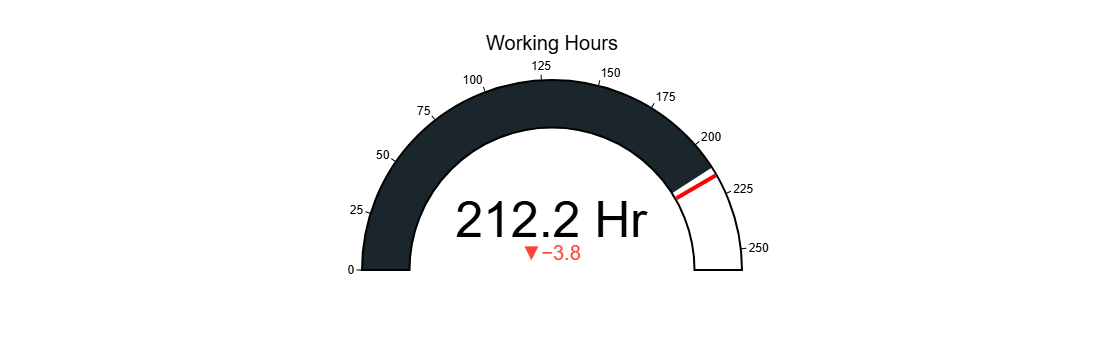

In [8]:
import plotly.graph_objects as go
from datetime import timedelta

def create_gauge_chart(employee_name):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    office_working_days = employee_data['reportMetric']['OfficeWorkingDays']
    total_working_hours_str = employee_data['reportMetric']['EmployeeTotalWorkingHours']
    
    # Calculate expected working hours
    expected_working_hours = office_working_days * 9
    
    # Convert total working hours string to hours
    total_working_hours_parts = total_working_hours_str.split(':')
    total_working_hours = int(total_working_hours_parts[0]) + int(total_working_hours_parts[1]) / 60
    
    # Determine the color based on whether total working hours exceed expected working hours
    if total_working_hours >= expected_working_hours:
        bar_color = "#018749"
    else:
        bar_color = "#1B262C"
    
    # Create the gauge chart
# Adjust the font size for delta and number
    fig = go.Figure(go.Indicator(
        mode = "gauge+number+delta",
        value = total_working_hours,
        number = {'suffix': " Hr", 'font': {'size': 50}},  # Adjust the font size for the number
        domain = {'x': [0, 1], 'y': [0, 1]},
        title = {'text': f"Working Hours", 'font': {'size': 20}},
        delta = {'reference': expected_working_hours, 'increasing': {'color': "#018749"}, 'font': {'size': 20}},  # Adjust the font size for delta
        gauge = {
            'axis': {'range': [None, expected_working_hours * 1.2], 'tickwidth': 1, 'tickcolor': "black", 'tickmode': 'array', 'tickvals': list(range(0, int(expected_working_hours * 1.2) + 1, 25))},
            'bar': {'color': bar_color,'thickness': 1},
            'bgcolor': "white",
            'borderwidth': 2,
            'bordercolor': "black",
            'steps': [
                {'range': [0, expected_working_hours * 0.5], 'color': 'white'},
                {'range': [expected_working_hours * 0.5, expected_working_hours], 'color': 'white'}],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.95,
                'value': expected_working_hours}}))

    fig.update_layout(
        paper_bgcolor = "rgba(255, 255, 255, 0)", 
        plot_bgcolor = "rgba(255, 255, 255, 0)",
        font = {'color': "black", 'family': "Arial"},
        margin=dict(l=50, r=50, t=80, b=80),  # Set margins to 0 to reduce background space
        width=500,  # Adjust the width as needed
        height=350,  # Adjust the height as needed
    )

    return fig


# Prompt for employee name and create gauge chart
employee_name_input = 'Kajal Lokhande'
create_gauge_chart(employee_name_input)

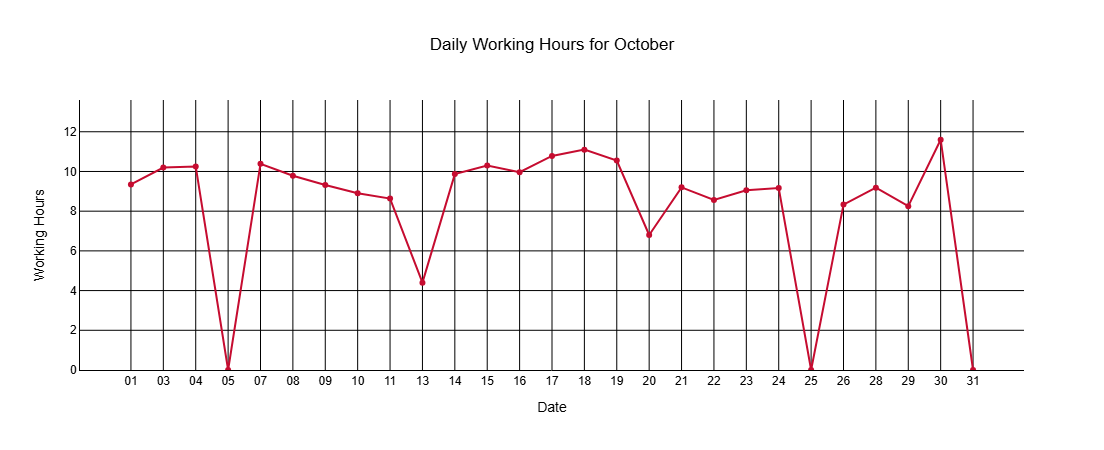

In [19]:
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

def create_line_chart(employee_name):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    status = employee_data['Status']
    daily_working_hours = employee_data['dailyWorkingHours']
    
    # Filter out days with status 'HO' or 'WO'
    filtered_dates = []
    filtered_hours = []
    for day, stat, hours in zip(days, status, daily_working_hours):
        if stat not in ['HO', 'WO']:
            filtered_dates.append(day)
            filtered_hours.append(hours)
    
    # Convert 'NaT' to 0 and other time strings to hours
    filtered_hours = [0 if hours == 'NaT' else int(hours.split(':')[0]) + int(hours.split(':')[1]) / 60 for hours in filtered_hours]
    
    # Convert string dates to datetime objects
    dates = [datetime.strptime(day.split(',')[0], '%d %B %Y') for day in filtered_dates]
    
    # Extract the month from the first date for the title
    month = dates[0].strftime('%B') if dates else ""
    
    # Format dates to only show the day of the month
    formatted_dates = [date.strftime('%d') for date in dates]
    
    # Create the line chart
    fig = px.line(x=formatted_dates, y=filtered_hours, labels={'x': 'Date', 'y': 'Working Hours'}, title=f'Daily Working Hours for {month}')
    fig.update_traces(mode='lines+markers', line=dict(color='#C60C30'))
    
    # Update layout to add axis lines, light grey grids for alternate points, make background transparent
    # and disable zooming, panning, and scrolling
    fig.update_layout(
        width=1300,
        height=450,
        title={'x': 0.5},
        paper_bgcolor="rgba(0, 0, 0, 0)",
        plot_bgcolor="rgba(0, 0, 0, 0)",
        font={'color': "black", 'family': "Arial"},
        xaxis=dict(
            showline=True, linecolor='black', showgrid=True, gridcolor='black', dtick='D2',
            fixedrange=True  # Disable zooming and panning on x-axis
        ),
        yaxis=dict(
            showline=True, linecolor='black', showgrid=True, gridcolor='black', dtick=2,
            fixedrange=True,  # Disable zooming and panning on y-axis
            range=[0, max(filtered_hours) + 2]  # Set the range for y-axis to start from 0
        ),
        dragmode=False  # Disable drag interactions
    )
    
    # Disable scroll and zoom interactions
    fig.update_layout(xaxis=dict(fixedrange=True), yaxis=dict(fixedrange=True))
    fig.update_layout(dragmode=False)
    
    fig.show()

# Prompt for employee name and create gauge chart and line chart
employee_name_input = 'Sneha Varghese'
create_line_chart(employee_name_input)

In [12]:
import plotly.graph_objects as go

def create_donut_chart(employee_name, employee_dict):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    status = employee_data['Status']
    
    # Extract attendance status counts
    status_counts = {
        'Present': status.count('P'),
        'Present Half Day': status.count('P1/2'),
        'Holiday': status.count('HO'),
        'Absent': status.count('A'),
        'WOP': status.count('WOP'),
        'WOS': status.count('WOS')
    }
    
    # Create labels with values in brackets
    labels = [f"{key} ({value})" for key, value in status_counts.items()]
    values = list(status_counts.values())
    colors = ['#143D60', '#3282B8', '#FCC737', '#8E1616', '#0CAFFF', '#1B262C']  # Custom colors for each status
    
    fig = go.Figure(data=[go.Pie(
        labels=labels, 
        values=values, 
        hole=.3, 
        marker=dict(colors=colors, line=dict(color='white', width=2))  # Add white outlines
    )])
    fig.update_traces(textinfo='percent+label', textposition='inside', insidetextorientation='radial')
    
    fig.update_layout(
        width=500,  # Set the width of the chart
        height=500,  # Set the height of the chart
        title_text=f'Attendance Status',
        title_x=0.5,
        title_font=dict(size=20, color='black'),
        annotations=[dict(text='', x=0.5, y=0.5, font_size=20, showarrow=False)],
        margin=dict(t=80, b=20, l=12, r=12),
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2,
            xanchor="center",
            x=0.5,
            font=dict(size=12)
        ),
        paper_bgcolor='rgba(0, 0, 0, 0)',  # Remove background color
        plot_bgcolor='rgba(0, 0, 0, 0)'  # Remove plot background color
    )
    
    return fig

# Prompt for employee name and create donut chart
employee_name_input = 'Kajal Lokhande'
create_donut_chart(employee_name_input, employee_dict)

In [13]:
import plotly.graph_objects as go
import plotly.express as px

def create_halfday_barchart(employee_name, employee_dict):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    Half_Day_Mapping = employee_data['HalfDayMapping']
    
    # Format the days to show only the day of the month
    formatted_days = [day.split()[0].zfill(2) for day in days]
    
    # Use indices for the x-axis values and dates as labels
    indices = list(range(len(formatted_days)))
    
    # Create the contribution graph-like chart
    fig = go.Figure(data=go.Heatmap(
        z=[Half_Day_Mapping],
        x=formatted_days,
        y=[employee_name],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and light green for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=1,  # Gap between boxes along y-axis
        text=[f"Day: {day}, Half Day Mapping: {mark}" for day, mark in zip(formatted_days, Half_Day_Mapping)],
        hoverinfo="text",
    ))
    
    # Update layout for better visualization
    fig.update_layout(
        title={
            'text': 'Half Day Mapping',
            'y': 0.70,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        yaxis=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showticklabels=False,  # Hide y-axis labels
            showgrid=False,
            fixedrange=True  # Make y-axis static
        ),
        font={'color': "black", 'family': "Arial"},
        paper_bgcolor="rgba(0, 0, 0, 0)", 
        plot_bgcolor="rgba(0, 0, 0, 0)",
        height=210,  # Set the height of the plot to make the y-axis smaller
        width=1000    # Set a width for the plot to maintain aspect ratio
    )
    
    fig.show()

create_halfday_barchart('Priyanka Bhise', employee_dict)

In [14]:
import plotly.graph_objects as go
import plotly.express as px

def create_barchart(employee_name, employee_dict):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    earlyLeaveMap = employee_data['earlyLeaveMap']
    
    # Format the days to show only the day of the month
    formatted_days = [day.split()[0].zfill(2) for day in days]
    
    # Use indices for the x-axis values and dates as labels
    indices = list(range(len(formatted_days)))
    
    # Create the Early Leave Map chart
    fig_earlyleave = go.Figure(data=go.Heatmap(
        z=[earlyLeaveMap],
        x=formatted_days,
        y=[employee_name],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and light green for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=1,  # Gap between boxes along y-axis
        text=[f"Day: {day}, Early Leave: {mark}" for day, mark in zip(formatted_days, earlyLeaveMap)],
        hoverinfo="text",
    ))
    
    # Update layout for Early Leave Map chart
    fig_earlyleave.update_layout(
        title={
            'text': 'Early Leave Map',
            'y': 0.70,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        yaxis=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showticklabels=False,  # Hide y-axis labels
            showgrid=False,
            fixedrange=True  # Make y-axis static
        ),
        font={'color': "black", 'family': "Arial"},
        paper_bgcolor="rgba(0, 0, 0, 0)", 
        plot_bgcolor="rgba(0, 0, 0, 0)",
        height=210,  # Set the height of the plot to make the y-axis smaller
        width=1000    # Set a width for the plot to maintain aspect ratio
    )
    
    fig_earlyleave.show()



create_barchart('Priyanka Bhise', employee_dict)

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_combined_barchart(employee_name, employee_dict):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    Half_Day_Mapping = employee_data['HalfDayMapping']
    earlyLeaveMap = employee_data['earlyLeaveMap']
    
    # Format the days to show only the day of the month
    formatted_days = [day.split()[0].zfill(2) for day in days]
    
    # Create subplots with no vertical spacing
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.05,
    )
    
    # Add Half Day Mapping heatmap
    fig.add_trace(go.Heatmap(
        z=[Half_Day_Mapping],
        x=formatted_days,
        y=['Half Day Mapping'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and light green for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Half Day Mapping: {mark}" for day, mark in zip(formatted_days, Half_Day_Mapping)],
        hoverinfo="text",
    ), row=1, col=1)
    
    # Add Early Leave Map heatmap
    fig.add_trace(go.Heatmap(
        z=[earlyLeaveMap],
        x=formatted_days,
        y=['Early Leave Map'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and light green for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0.5,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Early Leave: {mark}" for day, mark in zip(formatted_days, earlyLeaveMap)],
        hoverinfo="text",
    ), row=2, col=1)
    
    # Update layout for the combined chart
    fig.update_layout(
        title={
            'text': 'Half Day Mapping and Early Leave Map',
            'y': 0.75,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        xaxis2=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        yaxis=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        yaxis2=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        font={'color': "black", 'family': "Arial"},
        paper_bgcolor="rgba(0, 0, 0, 0)", 
        plot_bgcolor="rgba(0, 0, 0, 0)",
        height=250,  # Set the height of the plot
        width=1100,  # Set a width for the plot to maintain aspect ratio
        annotations=[
            dict(
                x=-0.065,
                y=0.95,
                xref='paper',
                yref='paper',
                text='Half Days',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            ),
            dict(
                x=-0.085,
                y=0.10,
                xref='paper',
                yref='paper',
                text='Early Leaves',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            )
        ]
    )
    
    fig.show()


create_combined_barchart('Priyanka Bhise', employee_dict)

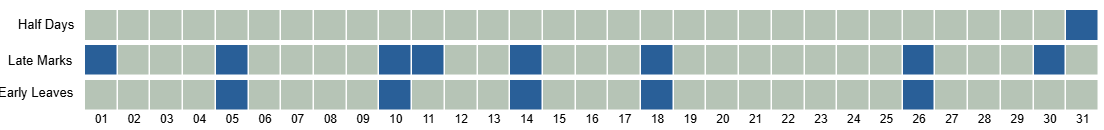

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_combined_barchart(employee_name, employee_dict):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    Half_Day_Mapping = employee_data['HalfDayMapping']
    earlyLeaveMap = employee_data['earlyLeaveMap']
    lateMark = employee_data['lateMark']
    
    # Format the days to show only the day of the month
    formatted_days = [day.split()[0].zfill(2) for day in days]
    
    # Create subplots with no vertical spacing
    fig = make_subplots(
        rows=3, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.05,
    )
    
    # Add Half Day Mapping heatmap
    fig.add_trace(go.Heatmap(
        z=[Half_Day_Mapping],
        x=formatted_days,
        y=['Half Day Mapping'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and blue for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Half Day Mapping: {mark}" for day, mark in zip(formatted_days, Half_Day_Mapping)],
        hoverinfo="text",
        zmin=0, zmax=1  # Ensure the colorscale does not interpolate
    ), row=1, col=1)
    
    # Add Late Mark heatmap
    fig.add_trace(go.Heatmap(
        z=[lateMark],
        x=formatted_days,
        y=['Late Mark'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and blue for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0.5,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Late Mark: {mark}" for day, mark in zip(formatted_days, lateMark)],
        hoverinfo="text",
        zmin=0, zmax=1  # Ensure the colorscale does not interpolate
    ), row=2, col=1)
    
    # Add Early Leave Map heatmap
    fig.add_trace(go.Heatmap(
        z=[earlyLeaveMap],
        x=formatted_days,
        y=['Early Leave Map'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and blue for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0.5,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Early Leave: {mark}" for day, mark in zip(formatted_days, earlyLeaveMap)],
        hoverinfo="text",
        zmin=0, zmax=1  # Ensure the colorscale does not interpolate
    ), row=3, col=1)
    
    # Update layout for the combined chart
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        xaxis2=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        xaxis3=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        yaxis=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        yaxis2=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        yaxis3=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        font={'color': "black", 'family': "Arial"},
        paper_bgcolor="rgba(225, 225, 225, 0)",  # Transparent background
        plot_bgcolor="rgba(225, 225, 225, 0)",  # Transparent plot background
        height=130,  # Set the height of the plot
        width=1070,  # Set a width for the plot to maintain aspect ratio
        margin=dict(l=85, r=5, b=10, t=10),  # Set margins (left, right, bottom, top)
        annotations=[
            dict(
                x=-0.068,
                y=0.95,
                xref='paper',
                yref='paper',
                text='Half Days',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            ),
            dict(
                x=-0.078,
                y=0.5,
                xref='paper',
                yref='paper',
                text='Late Marks',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            ),
            dict(
                x=-0.088,
                y=0.09,
                xref='paper',
                yref='paper',
                text='Early Leaves',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            )
        ]
    )
    
    return fig


create_combined_barchart('Kajal Lokhande', employee_dict)

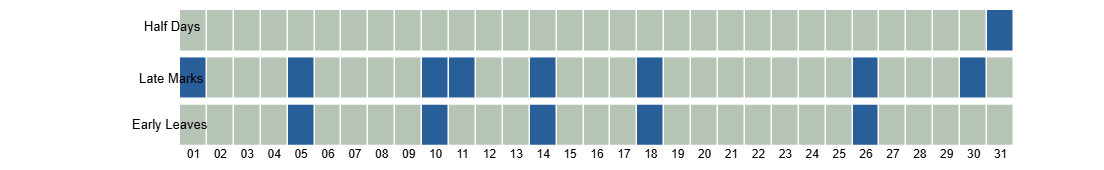

In [124]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_combined_barchart(employee_name, employee_dict):
    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return


    
    employee_data = employee_dict[employee_name]
    
    days = employee_data['Days']
    Half_Day_Mapping = employee_data['HalfDayMapping']
    earlyLeaveMap = employee_data['earlyLeaveMap']
    lateMark = employee_data['lateMark']

    # Format the days to show only the day of the month
    formatted_days = [day.split()[0].zfill(2) for day in days]

    # Create subplots with no vertical spacing
    fig = make_subplots(
        rows=3, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.05,
    )

    # Add Half Day Mapping heatmap
    fig.add_trace(go.Heatmap(
        z=[Half_Day_Mapping],
        x=formatted_days,
        y=['Half Day Mapping'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and blue for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Half Day Mapping: {mark}" for day, mark in zip(formatted_days, Half_Day_Mapping)],
        hoverinfo="text",
        zmin=0, zmax=1  # Ensure the colorscale does not interpolate
    ), row=1, col=1)

    # Add Late Mark heatmap
    fig.add_trace(go.Heatmap(
        z=[lateMark],
        x=formatted_days,
        y=['Late Mark'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and blue for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0.5,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Late Mark: {mark}" for day, mark in zip(formatted_days, lateMark)],
        hoverinfo="text",
        zmin=0, zmax=1  # Ensure the colorscale does not interpolate
    ), row=2, col=1)

    # Add Early Leave Map heatmap
    fig.add_trace(go.Heatmap(
        z=[earlyLeaveMap],
        x=formatted_days,
        y=['Early Leave Map'],
        colorscale=[[0, '#B6C4B6'], [1, '#295F98']],  # Light grey for 0 and blue for 1
        showscale=False,
        xgap=1.5,  # Gap between boxes along x-axis
        ygap=0.5,  # No gap between boxes along y-axis
        text=[f"Day: {day}, Early Leave: {mark}" for day, mark in zip(formatted_days, earlyLeaveMap)],
        hoverinfo="text",
        zmin=0, zmax=1  # Ensure the colorscale does not interpolate
    ), row=3, col=1)

    # Update layout for the combined chart
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        xaxis2=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        xaxis3=dict(
            tickmode='array',
            tickvals=formatted_days,
            ticktext=formatted_days,
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide x-axis line
            showgrid=False,
            fixedrange=True  # Make x-axis static
        ),
        yaxis=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        yaxis2=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        yaxis3=dict(
            gridcolor='black',  # Dark black coloured grids
            zeroline=False,  # Hide y-axis line
            showgrid=False,
            fixedrange=True,  # Make y-axis static
            tickvals=[]  # Hide y-axis labels
        ),
        font={'color': "black", 'family': "Arial"},
        paper_bgcolor="rgba(225, 225, 225, 0)",  # Transparent background
        plot_bgcolor="rgba(225, 225, 225, 0)",  # Transparent plot background
        height=170,  # Set the height of the plot
        width=1750,  # Set a width for the plot to maintain aspect ratio
        margin=dict(l=180, r=90, b=10, t=10),  # Set margins (left, right, bottom, top)
        annotations=[
            dict(
                x= -0.045,
                y=0.95,
                xref='paper',
                yref='paper',
                text='Half Days',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            ),
            dict(
                x=-0.052,
                y=0.5,
                xref='paper',
                yref='paper',
                text='Late Marks',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            ),
            dict(
                x=-0.060,
                y=0.09,
                xref='paper',
                yref='paper',
                text='Early Leaves',
                showarrow=False,
                font=dict(size=13),
                textangle=0
            )
        ]
    )

    return fig


create_combined_barchart('Kajal Lokhande', employee_dict)

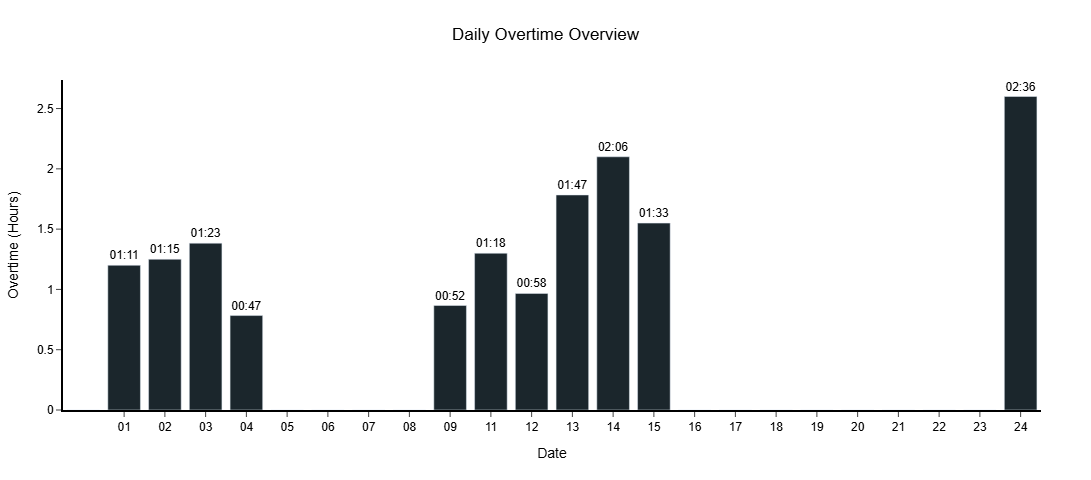

In [176]:
def create_overtime_barchart(employee_name):
    
    def format_time_in_hours_and_minutes(hours_decimal):
        """Convert decimal hours to HH:MM format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}:{minutes:02d}"

    def format_time_in_hours_and_minutes_text(hours_decimal):
        """Convert decimal hours to HHhr:MMmins format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}hr:{minutes:02d}mins"
        if employee_name not in employee_dict:
            print(f"Employee '{employee_name}' not found in the employee_dict.")
            return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    overtimes = employee_data['OverTime']
    
    # Initialize lists for all dates and corresponding overtimes
    all_days = []
    all_overtimes = []
    
    # Populate all_days with formatted day numbers and all_overtimes with corresponding overtime values
    for day, overtime in zip(days, overtimes):
        day_number = datetime.strptime(day, '%d %B %Y, %A').day
        all_days.append(f'{day_number:02d}')
        
        hours, minutes = map(int, overtime.split(':'))
        total_minutes = hours * 60 + minutes
        if total_minutes >= 30:
            all_overtimes.append(total_minutes / 60)  # Convert to hours
        else:
            all_overtimes.append(0)  # No bar for overtime less than 30 minutes
    
    text_outside_bars = [format_time_in_hours_and_minutes(ot) if ot > 0 else "" for ot in all_overtimes]
    hover_texts = [format_time_in_hours_and_minutes_text(ot) if ot > 0 else "" for ot in all_overtimes]
    
    # Create the bar chart
    fig = go.Figure(data=[
        go.Bar(
            x=all_days,
            y=all_overtimes,
            marker_color="#1B262C",
            text=text_outside_bars,
            hovertext=hover_texts,
            hoverinfo='text',
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f"Daily Overtime Overview",
        title_x=0.5,  # Center the title
        xaxis_title="Date",
        yaxis_title="Overtime (Hours)",
        xaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
            tickmode='array',
            tickvals=list(range(1, len(all_days) + 1)),
            ticktext=all_days,
            automargin=True,
            fixedrange=True  # Disable zooming and panning
        ),
        yaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
            fixedrange=True  # Disable zooming and panning
        ),
        paper_bgcolor="rgba(255, 255, 255, 0)",
        plot_bgcolor="rgba(255, 255, 255, 0)",
        font=dict(
            color="black",
            family="Arial"
        ),
        margin=dict(l=50, r=50, t=80, b=70),  # Adjust bottom margin for tick labels
        width=1000,
        height=480,
    )
    
    return fig

# Prompt for employee name and create overtime bar chart
employee_name_input = 'Sneha Varghese'
create_overtime_barchart(employee_name_input).show()

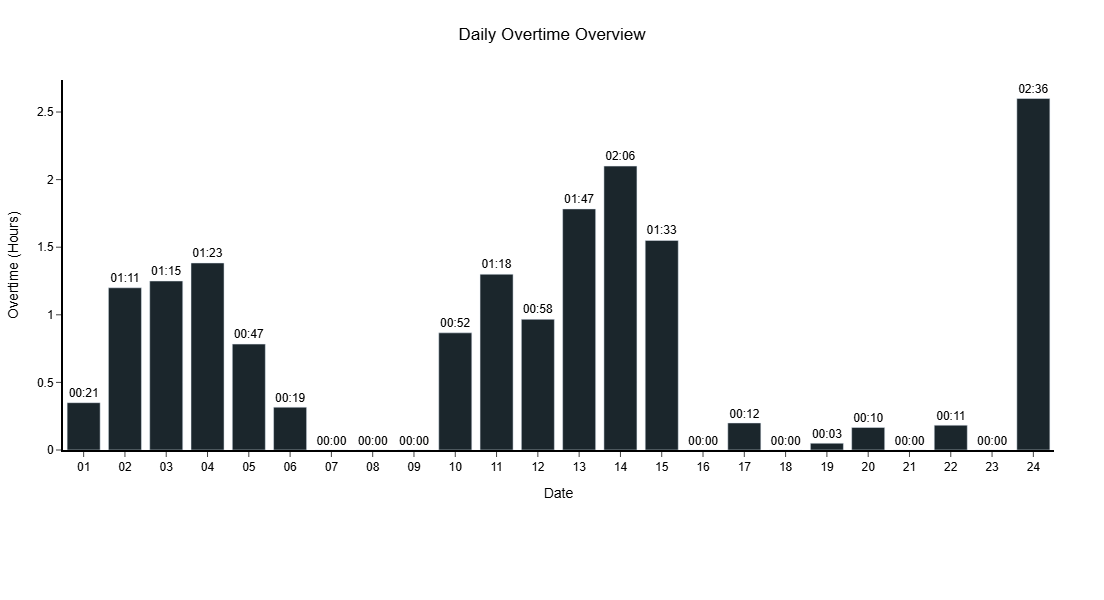

In [193]:
import plotly.graph_objects as go
from datetime import datetime

def create_overtime_barchart(employee_name, employee_dict):
    def format_time_in_hours_and_minutes(hours_decimal):
        """Convert decimal hours to HH:MM format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}:{minutes:02d}"

    def format_time_in_hours_and_minutes_text(hours_decimal):
        """Convert decimal hours to HHhr:MMmins format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}hr:{minutes:02d}mins"

    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    overtimes = employee_data['OverTime']
    
    # Initialize lists for all dates and corresponding overtimes
    all_days = []
    all_overtimes = []
    
    # Populate all_days with formatted day numbers and all_overtimes with corresponding overtime values
    for day, overtime in zip(days, overtimes):
        day_number = datetime.strptime(day, '%d %B %Y, %A').day
        all_days.append(f'{day_number:02d}')
        
        hours, minutes = map(int, overtime.split(':'))
        total_minutes = hours * 60 + minutes
        all_overtimes.append(total_minutes / 60)  # Convert to hours
    
    text_outside_bars = [format_time_in_hours_and_minutes(ot) for ot in all_overtimes]
    hover_texts = [format_time_in_hours_and_minutes_text(ot) for ot in all_overtimes]
    
    # Create the bar chart
    fig = go.Figure(data=[
        go.Bar(
            x=all_days,
            y=all_overtimes,
            marker_color="#1B262C",
            text=text_outside_bars,
            hovertext=hover_texts,
            hoverinfo='text',
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f"Daily Overtime Overview",
        title_x=0.5,  # Center the title
        xaxis_title="Date",
        yaxis_title="Overtime (Hours)",
        xaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
            tickangle=0  # No rotation for tick labels
        ),
        yaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
        ),
        paper_bgcolor="rgba(255, 255, 255, 0)",
        plot_bgcolor="rgba(255, 255, 255, 0)",
        font=dict(
            color="black",
            family="Arial"
        ),
        margin=dict(l=50, r=50, t=80, b=150),  # Adjust bottom margin for tick labels
        width=1000,
        height=600,
    )
    
    return fig

# Example usage
employee_name_input = 'Sneha Varghese'
fig = create_overtime_barchart(employee_name_input, employee_dict)
if fig is not None:
    fig.show()

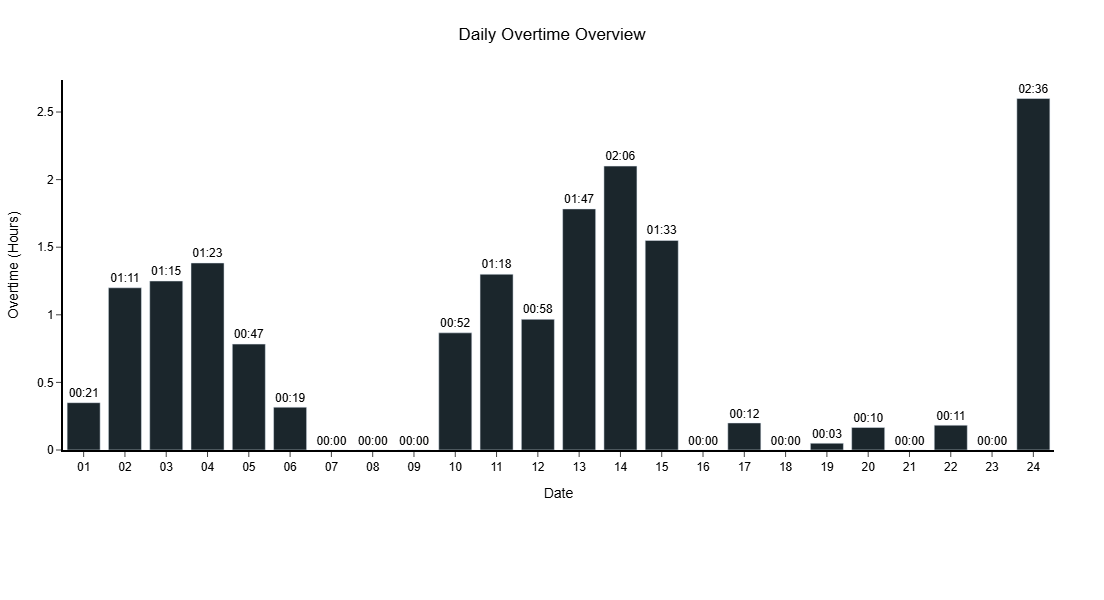

In [194]:
import plotly.graph_objects as go
from datetime import datetime

def create_overtime_barchart(employee_name, employee_dict):
    def format_time_in_hours_and_minutes(hours_decimal):
        """Convert decimal hours to HH:MM format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}:{minutes:02d}"

    def format_time_in_hours_and_minutes_text(hours_decimal):
        """Convert decimal hours to HHhr:MMmins format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}hr:{minutes:02d}mins"

    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    overtimes = employee_data['OverTime']
    
    # Initialize lists for all dates and corresponding overtimes
    all_days = []
    all_overtimes = []
    
    # Populate all_days with formatted day numbers and all_overtimes with corresponding overtime values
    for day, overtime in zip(days, overtimes):
        day_number = datetime.strptime(day, '%d %B %Y, %A').day
        all_days.append(f'{day_number:02d}')
        
        hours, minutes = map(int, overtime.split(':'))
        total_minutes = hours * 60 + minutes
        all_overtimes.append(total_minutes / 60)  # Convert to hours
    
    text_outside_bars = [format_time_in_hours_and_minutes(ot) for ot in all_overtimes]
    hover_texts = [format_time_in_hours_and_minutes_text(ot) for ot in all_overtimes]
    
    # Create the bar chart
    fig = go.Figure(data=[
        go.Bar(
            x=all_days,
            y=all_overtimes,
            marker_color="#1B262C",
            text=text_outside_bars,
            hovertext=hover_texts,
            hoverinfo='text',
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f"Daily Overtime Overview",
        title_x=0.5,  # Center the title
        xaxis_title="Date",
        yaxis_title="Overtime (Hours)",
        xaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
            tickangle=0  # No rotation for tick labels
        ),
        yaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
        ),
        paper_bgcolor="rgba(255, 255, 255, 0)",
        plot_bgcolor="rgba(255, 255, 255, 0)",
        font=dict(
            color="black",
            family="Arial"
        ),
        margin=dict(l=50, r=50, t=80, b=150),  # Adjust bottom margin for tick labels
        width=1000,
        height=600,
    )
    
    return fig

# Example usage
employee_name_input = 'Sneha Varghese'
fig = create_overtime_barchart(employee_name_input, employee_dict)
if fig is not None:
    fig.show()

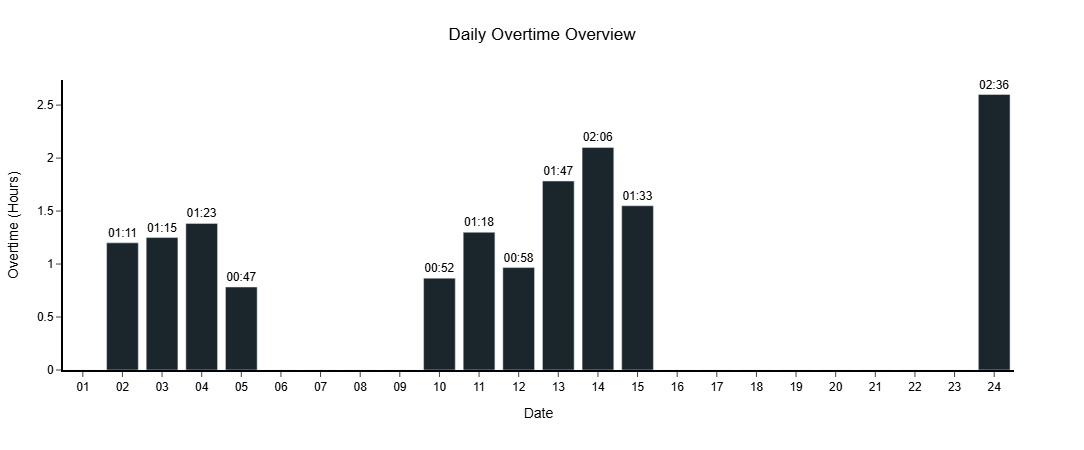

In [218]:
import plotly.graph_objects as go
from datetime import datetime

def create_overtime_barchart(employee_name, employee_dict):
    def format_time_in_hours_and_minutes(hours_decimal):
        """Convert decimal hours to HH:MM format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}:{minutes:02d}"

    def format_time_in_hours_and_minutes_text(hours_decimal):
        """Convert decimal hours to HHhr:MMmins format"""
        hours = int(hours_decimal)
        minutes = int((hours_decimal - hours) * 60)
        return f"{hours:02d}hr:{minutes:02d}mins"

    if employee_name not in employee_dict:
        print(f"Employee '{employee_name}' not found in the employee_dict.")
        return
    
    employee_data = employee_dict[employee_name]
    days = employee_data['Days']
    overtimes = employee_data['OverTime']
    
    # Initialize lists for all dates and corresponding overtimes
    all_days = []
    all_overtimes = []
    
    # Populate all_days with formatted day numbers and all_overtimes with corresponding overtime values
    for day, overtime in zip(days, overtimes):
        day_number = datetime.strptime(day, '%d %B %Y, %A').day
        all_days.append(f'{day_number:02d}')
        
        hours, minutes = map(int, overtime.split(':'))
        total_minutes = hours * 60 + minutes
        if total_minutes >= 30:
            all_overtimes.append(total_minutes / 60)  # Convert to hours
        else:
            all_overtimes.append(0)  # No bar for overtime less than 30 minutes
    
    text_outside_bars = [format_time_in_hours_and_minutes(ot) if ot > 0 else "" for ot in all_overtimes]
    hover_texts = [format_time_in_hours_and_minutes_text(ot) if ot > 0 else "" for ot in all_overtimes]
    
    # Create the bar chart
    fig = go.Figure(data=[
        go.Bar(
            x=all_days,
            y=all_overtimes,
            marker_color="#1B262C",
            text=text_outside_bars,
            hovertext=hover_texts,
            hoverinfo='text',
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f"Daily Overtime Overview",
        title_x=0.5,  # Center the title
        xaxis_title="Date",
        yaxis_title="Overtime (Hours)",
        xaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
            tickangle=0  # No rotation for tick labels
        ),
        yaxis=dict(
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Arial',
                size=12,
                color='black',
            ),
        ),
        paper_bgcolor="rgba(225, 225, 225, 0.0)",
        plot_bgcolor="rgba(225, 225, 225, 0.0)",
        font=dict(
            color="black",
            family="Arial"
        ),
        margin=dict(l=50, r=70, t=80, b=80),  # Adjust bottom margin for tick labels
        width=1000,
        height=450,
    )
    
    return fig

# Example usage
employee_name_input = 'Sneha Varghese'
fig = create_overtime_barchart(employee_name_input, employee_dict)
if fig is not None:
    fig.show()

In [32]:
test_dict = employee_dict["Sneha Varghese"]

In [39]:
def generate_star_rating_html(employee_dict):
    """
    Generates an HTML-friendly star rating graphic based on the value of the 'stars' key in the input dictionary.
    
    :param star_dict: A dictionary containing a key 'stars' with an integer value representing the number of stars.
    :return: A string containing HTML code for the star rating graphic.
    """
    adherenceRatioValue = employee_dict['generate_dataframe'].get("adherenceRatio", 0)
    workDeficitRatioValue = employee_dict.get("workDeficitRatio", 0)
    adjustAbsenteeValue = employee_dict['generate_dataframe'].get("adjustedAbsenteeRate", 0)
    
    adherenceRatioStar = employee_dict['generate_dataframe'].get("adherenceRatioStar", 0)
    workDeficitRatioStar = employee_dict.get("workDeficitRatioStar", 0)
    adjustAbsenteeStar = employee_dict['generate_dataframe'].get("adjustedAbsenteeRateStar", 0)
    
    # Generate star rating graphic
    full_star = "★"
    empty_star = "☆"
    max_stars = 5
    
    adherence_star_rating = full_star * adherenceRatioStar + empty_star * (max_stars - adherenceRatioStar)
    work_deficit_star_rating = full_star * workDeficitRatioStar + empty_star * (max_stars - workDeficitRatioStar)
    adjusted_absantee_star_rating = full_star * adjustAbsenteeStar + empty_star * (max_stars - adjustAbsenteeStar)
    
    # Generate HTML-friendly output
    html_output = f"""
    <h4>Punctuality Rating</h4>
    <div style='font-size: 50px; color: gold;'>
        {adherenceRatioValue}
        {adherence_star_rating}
    </div>
    <br>
    <h4>Overtime to Incomplete Rating</h4>
    <div style='font-size: 50px; color: gold;'>
        {workDeficitRatioValue}
        {work_deficit_star_rating}
    </div>
    <br>
    <h4>Absentism Rate</h4>
    <div style='font-size: 50px; color: gold;'>
        {adjustAbsenteeValue}
        {adjusted_absantee_star_rating}
    </div>
    """
    
    return html_output



star_rating_html = generate_star_rating_html(test_dict)
print(star_rating_html)


    <h4>Punctuality Rating</h4>
    <div style='font-size: 50px; color: gold;'>
        0.9
        ☆☆☆☆☆
    </div>
    <br>
    <h4>Overtime to Incomplete Rating</h4>
    <div style='font-size: 50px; color: gold;'>
        -0.05
        ★★★★☆
    </div>
    <br>
    <h4>Absentism Rate</h4>
    <div style='font-size: 50px; color: gold;'>
        10.0
        ★★★★★
    </div>
    
